In [67]:
from pickle import load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [53]:
#breast_dataset['label'].replace(0, 'Benign',inplace=True)
#breast_dataset['label'].replace(1, 'Malignant',inplace=True)
#breast_dataset.tail()

In [68]:
X = breast_dataset.drop(columns=['label'])
Y = breast_dataset['label']

In [69]:
#split the dataset for 80% training data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [58]:
Y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [60]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


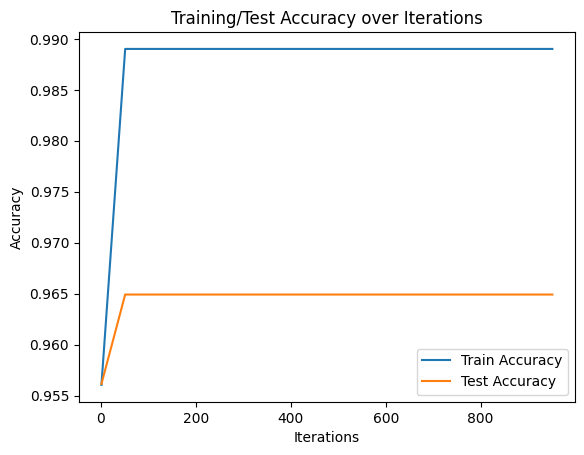

In [61]:
import warnings
warnings.filterwarnings('ignore')
train_accuracies = []
test_accuracies = []

for i in range(1, 1000, 50):
  model = LogisticRegression(max_iter = i, solver='liblinear')
  model.fit(X_train, Y_train)

  train_accuracy = model.score(X_train, Y_train)
  train_accuracies.append(train_accuracy)

  test_accuracy = model.score(X_test, Y_test)
  test_accuracies.append(test_accuracy)

iterations = np.arange(1, 1000, 50)
plt.plot(iterations, train_accuracies, label='Train Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.title('Training/Test Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(45.722222222222214, 0.5, 'Actual Label')

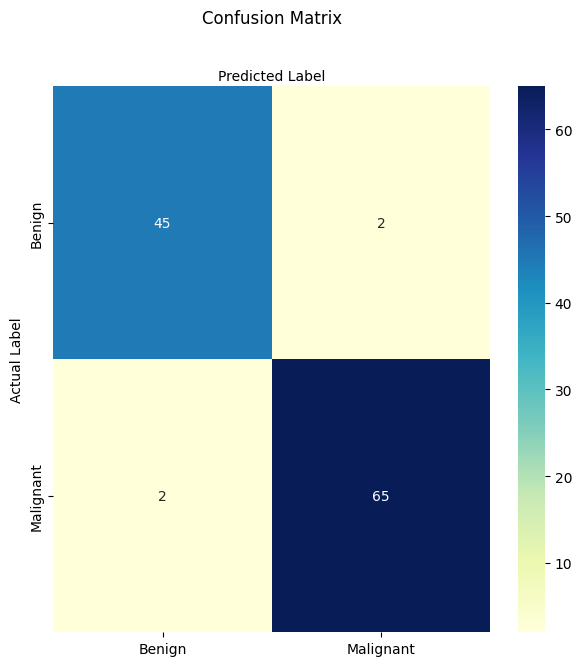

In [62]:
import seaborn as sns

plt.figure(figsize=(6,6))
ax = plt.subplot()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [73]:
#Adding a weight penalty, L2 regularization
classifier_l2_regularization = LogisticRegression(max_iter=10000, penalty='l2', C=0.01)
classifier_l2_regularization.fit(X_train, Y_train)

LogisticRegression(C=0.01, max_iter=10000)

In [74]:
#New predict with L2 regularization
Y_pred_l2 = classifier_l2_regularization.predict(X_test)

conf_matrix_l2 = confusion_matrix(Y_test, Y_pred_l2)

In [75]:
# Evaluate the model with L2 regularization using model evaluation metrics: accuracy, precision, recall, and F1 score
print("Accuracy with L2:",metrics.accuracy_score(Y_test, Y_pred_l2))
print("Precision with L2:",metrics.precision_score(Y_test, Y_pred_l2))
print("Recall with L2:",metrics.recall_score(Y_test, Y_pred_l2))
print("F1 Score with L2:",metrics.f1_score(Y_test, Y_pred_l2))

Accuracy with L2: 0.9473684210526315
Precision with L2: 0.9178082191780822
Recall with L2: 1.0
F1 Score with L2: 0.9571428571428572


Text(45.722222222222214, 0.5, 'Actual label')

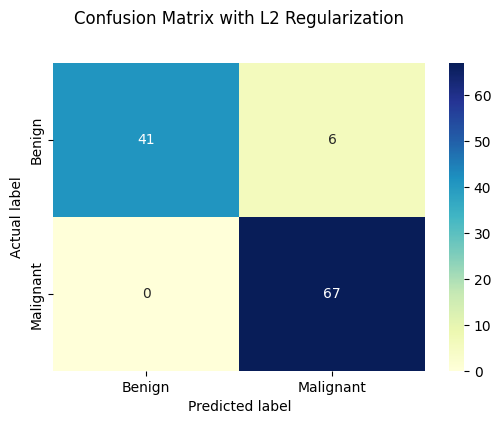

In [76]:
# Visualize the results of the model with L2 regularization in the form of a confusion matrix using matplotlib and seaborn
# Plot the confusion matrix with L2 regularization using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(conf_matrix_l2), annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix with L2 Regularization', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')